In [1]:
from centrex_tlf import states, hamiltonian, couplings

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 15})

In [3]:
qn_select = states.QuantumSelector(J=1)
ground_states = states.generate_coupled_states_X(qn_select)

In [4]:
qn_select = states.QuantumSelector(J=1, F1=1 / 2, F=1, P=1, Ω=1)
excited_states = states.generate_coupled_states_B(qn_select)

In [5]:
reduced_hamiltonian = hamiltonian.generate_total_reduced_hamiltonian(
    X_states_approx=ground_states,
    B_states_approx=excited_states,   
)

In [6]:
field = couplings.generate_coupling_field_automatic(
    ground_states_approx=ground_states,
    excited_states_approx=excited_states,
    QN_basis = ground_states+excited_states,
    H_rot = reduced_hamiltonian.H_int,
    QN = reduced_hamiltonian.QN,
    V_ref = reduced_hamiltonian.V_ref_int,
    pol_vecs = [
        couplings.polarization_σp.vector,
        couplings.polarization_σm.vector
    ],
)

In [7]:
field

CouplingFields(ground_main=|X, J = 1, F₁ = 3/2, F = 2, mF = 0, P = -, Ω = 0>, excited_main=|B, J = 1, F₁ = 1/2, F = 1, mF = 1, P = +, Ω = 1>, main_coupling=1.70e-01+0.00e+00j

In [8]:
dfs = couplings.generate_coupling_dataframe(field, reduced_hamiltonian.QN)

In [9]:
for df in dfs:
    display(df)

,ground,excited,couplings
0,"|X, J = 1, F₁ = 1/2, F = 0, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = 1>",-0.467636+0.000000j
1,"|X, J = 1, F₁ = 1/2, F = 1, mF = -1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",0.457780+0.000000j
2,"|X, J = 1, F₁ = 1/2, F = 1, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = 1>",0.457780+0.000000j
3,"|X, J = 1, F₁ = 3/2, F = 1, mF = -1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",-0.192492+0.000000j
4,"|X, J = 1, F₁ = 3/2, F = 1, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = 1>",-0.192492+0.000000j
5,"|X, J = 1, F₁ = 3/2, F = 2, mF = -2>","|B, J = 1, F₁ = 1/2, F = 1, mF = -1>",-0.415661+0.000000j
6,"|X, J = 1, F₁ = 3/2, F = 2, mF = -1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",0.293917+0.000000j
7,"|X, J = 1, F₁ = 3/2, F = 2, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = 1>",0.169693+0.000000j


,ground,excited,couplings
0,"|X, J = 1, F₁ = 1/2, F = 0, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = -1>",-0.467636+0.000000j
1,"|X, J = 1, F₁ = 1/2, F = 1, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = -1>",-0.457780+0.000000j
2,"|X, J = 1, F₁ = 1/2, F = 1, mF = 1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",0.457781+0.000000j
3,"|X, J = 1, F₁ = 3/2, F = 1, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = -1>",0.192492+0.000000j
4,"|X, J = 1, F₁ = 3/2, F = 1, mF = 1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",-0.192493+0.000000j
5,"|X, J = 1, F₁ = 3/2, F = 2, mF = 0>","|B, J = 1, F₁ = 1/2, F = 1, mF = -1>",0.169693+0.000000j
6,"|X, J = 1, F₁ = 3/2, F = 2, mF = 1>","|B, J = 1, F₁ = 1/2, F = 1, mF = 0>",-0.293917+0.000000j
7,"|X, J = 1, F₁ = 3/2, F = 2, mF = 2>","|B, J = 1, F₁ = 1/2, F = 1, mF = 1>",-0.415661+0.000000j


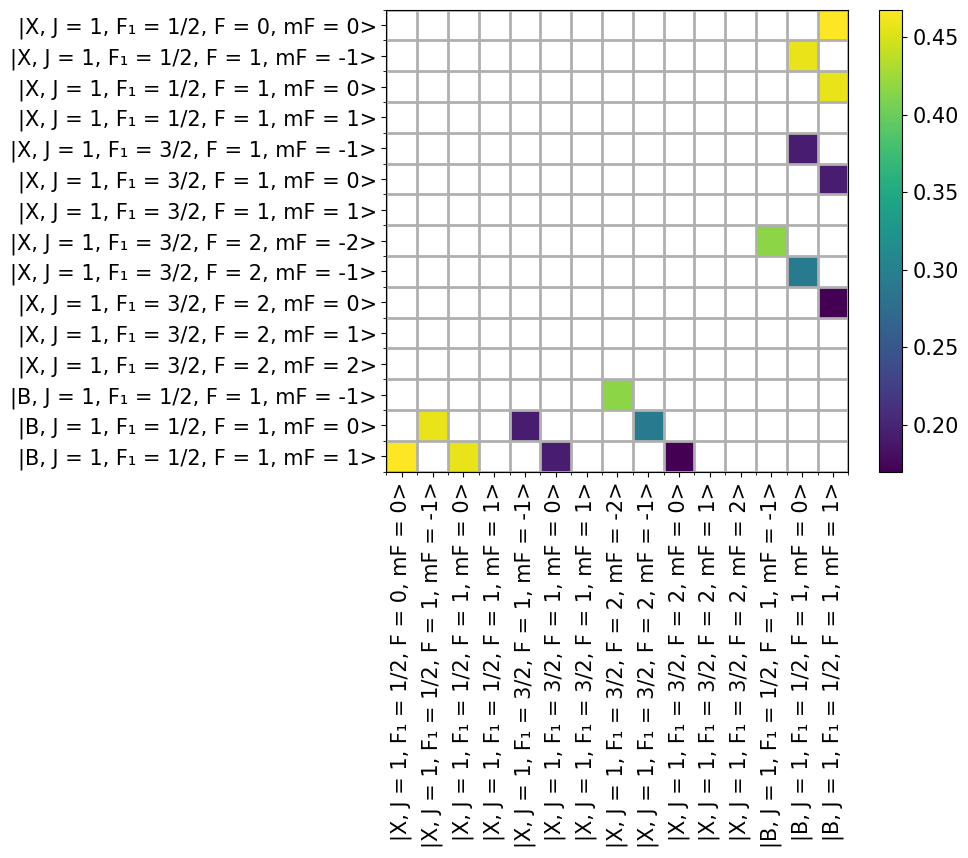

In [10]:
z = np.abs(field.fields[0].field)
z[z == 0] = np.nan

custom_string = ["electronic", "J", "F1", "F", "mF"]

fig, ax = plt.subplots(figsize = (8,6))

c = ax.imshow(z)
cbar = fig.colorbar(c)

ax.set_xticks(np.arange(len(z)))
ax.set_yticks(np.arange(len(z)))
ax.set_xticklabels(
    [qn.largest.state_string_custom(custom_string) for qn in reduced_hamiltonian.QN],
    rotation='vertical'
)
ax.set_yticklabels(
    [qn.largest.state_string_custom(custom_string) for qn in reduced_hamiltonian.QN]
)
ax.set_xticks(np.arange(len(z)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(z)+1)-0.5, minor=True)
ax.grid(which='minor', linestyle='-', linewidth=2)